# Exploring Corona virus Data

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [2]:
covid_data=pd.ExcelFile(r'C:\Users\faizah\Downloads\corona-virus-pakistan-dataset-2020\COVID_FINAL_DATA.xlsx')
covid_data.sheet_names

['TimeSeries_KeyIndicators',
 'TimeSeries_KeyIndicators_Detail',
 'TimeSeries_Action_Screen',
 'TimeSeries_Action_Call',
 'TimeSeries_COVID_News',
 'TimeSeries_NIH_Response',
 'TimeSeries_NIH_Risk',
 'TimeSeries_Province_Response',
 'TimeSeries_Helpline_Calls',
 'TimeSeries_Quarantine_Details']

**Cleaning Sheet1**

In [3]:
sheet1=covid_data.parse('TimeSeries_KeyIndicators')  #Opening  first sheet
#print(df1.columns) 
sheet1.head()


,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [4]:
sheet1.shape

(398, 12)

In [5]:
sheet1.rename(columns={'Cumulative':'Suspected_cases','Discharged':'Recovered','Still admitted':'Hospital_quarantine','Cumulative  Test positive':'Confirmed','New  (last 24 hrs)':'New_cases','Cumulative  tests performed':'Total_tests_performed','Tests  performed in last 24 hours':'New_tests_performed','Expired':'Dead','Home Quarantine':'Home_quarantine'},inplace=True)
sheet1.head()

,Unnamed: 0,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [6]:
sheet1.loc[sheet1['Unnamed: 0']==5] #query based on assigned indexes but doesn't define uniquely row

,Unnamed: 0,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
9,5,67,0,105,2020-03-12 00:00:00,0,0,NaN,6,Punjab,0,10
17,5,71,0,110,2020-03-13 00:00:00,0,0,NaN,4,Punjab,0,5
25,5,77,0,116,2020-03-14 00:00:00,0,0,NaN,6,Punjab,0,6
33,5,83,0,126,2020-03-15 00:00:00,0,0,NaN,6,Punjab,0,10
41,5,95,1,166,2020-03-16 00:00:00,0,0,NaN,12,Punjab,1,40
50,5,112,1,166,2020-03-17 00:00:00,0,0,NaN,17,Punjab,1,No 0
58,5,129,26,133,2020-03-18 00:00:00,0,0,NaN,17,Punjab,26,0
66,5,158,33,254,2020-03-19 00:00:00,0,0,NaN,29,Punjab,33,0
74,5,182,80,872,20-Mar-2020,0,0,NaN,24,Punjab,80,0


In [7]:
sheet1.index

RangeIndex(start=0, stop=398, step=1)

In [8]:
sheet1.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet1.head() 

,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed
0,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [9]:
#sheet1['Date']=pd.to_datetime(sheet1['Date']).dt.strftime('%d-%m-%Y') #change format acc to Pak date
sheet1['Date']=pd.to_datetime(sheet1.Date)                      #to date type
sheet1.head()

,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed
0,48,2,80,2020-03-11,0,0,NaN,3,ICT,2,8
1,61,0,95,2020-03-11,0,0,NaN,6,Punjab,0,7
2,84,14,171,2020-03-11,1,0,NaN,1,Sindh,13,55
3,20,0,28,2020-03-11,0,0,NaN,0,KP,0,2
4,3,0,0,2020-03-11,0,0,NaN,0,KPTD,0,0


In [10]:
print(sheet1.info())
print(sheet1.isnull().sum())                                     #finding NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
Suspected_cases          398 non-null int64
Confirmed                398 non-null int64
Total_tests_performed    398 non-null int64
Date                     398 non-null datetime64[ns]
Recovered                398 non-null int64
Dead                     398 non-null int64
Home_quarantine          259 non-null float64
New_cases                398 non-null int64
Region                   398 non-null object
Hospital_quarantine      398 non-null int64
New_tests_performed      398 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 34.3+ KB
None
Suspected_cases            0
Confirmed                  0
Total_tests_performed      0
Date                       0
Recovered                  0
Dead                       0
Home_quarantine          139
New_cases                  0
Region                     0
Hospital_quarantine        0
New_tests_performed  

In [11]:
sheet1[sheet1['New_tests_performed'].isin(['.','?','na','NA','N/A',np.nan,'No 0'])]

,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed
50,112,1,166,2020-03-17,0,0,NaN,17,Punjab,1,No 0


In [12]:
sheet1.isin(['.','?','na','NA','N/A',np.nan,'No 0'])

,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False


In [13]:
sheet1['New_tests_performed'].replace({'No 0':'0'},inplace=True)  #replacing No 0 value in New_tests with 0 as its like null but 0 for this column either count of test performed or not
sheet1[sheet1['New_tests_performed'].isin(['.','?','na','NA','N/A',np.nan,'No 0'])]

,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed


In [14]:
sheet1['New_tests_performed']=sheet1['New_tests_performed'].apply(np.int64)       #change type of New_testsas its ineteger
sheet1['Home_quarantine'].fillna(0,inplace=True)                #filling with 0 becuase at that time no homequarantine    
sheet1['Home_quarantine']=sheet1['Home_quarantine'].apply(np.int64)          #it can't be float
print(sheet1.isnull().sum())
print(sheet1.info())

Suspected_cases          0
Confirmed                0
Total_tests_performed    0
Date                     0
Recovered                0
Dead                     0
Home_quarantine          0
New_cases                0
Region                   0
Hospital_quarantine      0
New_tests_performed      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
Suspected_cases          398 non-null int64
Confirmed                398 non-null int64
Total_tests_performed    398 non-null int64
Date                     398 non-null datetime64[ns]
Recovered                398 non-null int64
Dead                     398 non-null int64
Home_quarantine          398 non-null int64
New_cases                398 non-null int64
Region                   398 non-null object
Hospital_quarantine      398 non-null int64
New_tests_performed      398 non-null int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 34.3+ KB
None


In [15]:
sheet1.duplicated().sum()

0

In [16]:
sheet1.Region.unique()

array(['ICT', 'Punjab', 'Sindh', 'KP', 'KPTD', 'Balochistan', 'AJK', 'GB',
       'Mobile Lab'], dtype=object)

In [17]:
sheet1.loc[sheet1['Region']=='KPTD']    #data is not defined for KPTD(Federally Administered Tribal Areas)

,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed
4,3,0,0,2020-03-11,0,0,0,0,KPTD,0,0
12,3,0,0,2020-03-12,0,0,0,0,KPTD,0,0
20,4,0,0,2020-03-13,0,0,0,1,KPTD,0,0
28,4,0,0,2020-03-14,0,0,0,0,KPTD,0,0
36,5,0,0,2020-03-15,0,0,0,1,KPTD,0,0
44,5,0,0,2020-03-16,0,0,0,0,KPTD,0,0
53,5,0,0,2020-03-17,0,0,0,0,KPTD,0,0
61,6,0,0,2020-03-18,0,0,0,1,KPTD,0,0
69,7,0,0,2020-03-19,0,0,0,1,KPTD,0,0
77,19,0,0,2020-03-20,0,0,0,12,KPTD,0,0


In [18]:
sheet1.loc[sheet1['Region']=='KPTD'].shape

(12, 11)

In [19]:
sheet1.loc[sheet1['Region']=='Mobile Lab']    #same is for Mobile Lab data is given for just few dates and that's also not proper

,Suspected_cases,Confirmed,Total_tests_performed,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospital_quarantine,New_tests_performed
48,0,6,28,2020-03-16,0,0,0,0,Mobile Lab,0,6


In [20]:
sheet1.drop(sheet1.loc[sheet1['Region'].isin(['KPTD','Mobile Lab'])].index,inplace=True)
sheet1.shape

(385, 11)

In [21]:
sheet1.describe()          #descriptive statistics

,Suspected_cases,Confirmed,Total_tests_performed,Recovered,Dead,Home_quarantine,New_cases,Hospital_quarantine,New_tests_performed
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,7401.301299,814.833766,9085.493506,237.246753,16.153247,321.233766,478.394805,225.407792,441.509091
std,12863.597625,1512.335120,17699.271304,596.813076,32.688952,1225.780705,863.961392,393.222871,832.157891
min,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,34.000000,580.000000,0.000000,0.000000,0.000000,19.000000,12.000000,0.000000
50%,2049.000000,206.000000,1974.000000,14.000000,2.000000,12.000000,118.000000,35.000000,66.000000
75%,8059.000000,722.000000,7519.000000,177.000000,14.000000,207.000000,495.000000,287.000000,396.000000
max,74533.000000,8103.000000,101897.000000,4994.000000,185.000000,21452.000000,6625.000000,2472.000000,5043.000000


In [24]:
confirmed_by_date = (sheet1.filter(['Date','Confirmed']).groupby('Date').agg('sum').reset_index())
confirmed_by_date

,Date,Confirmed
0,2020-03-11,19
1,2020-03-12,20
2,2020-03-13,21
3,2020-03-14,28
4,2020-03-15,31
5,2020-03-16,47
6,2020-03-17,187
7,2020-03-18,241
8,2020-03-19,302
9,2020-03-20,461


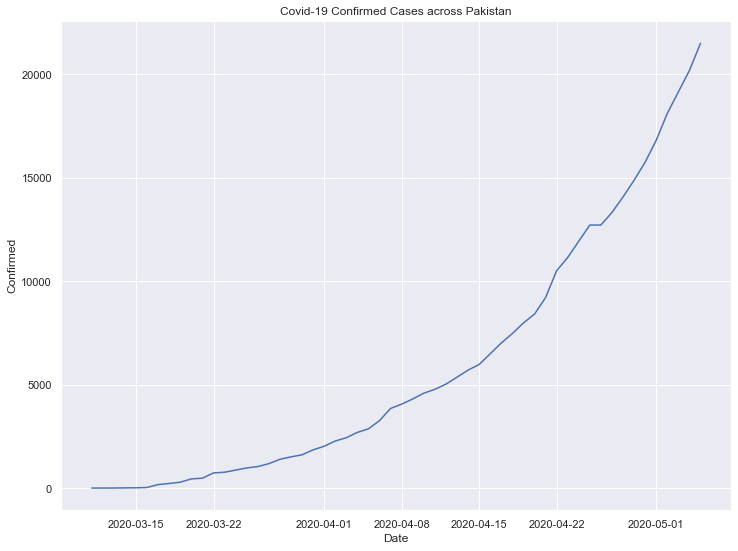

In [33]:
sns.set()
fig=sns.lineplot(data = confirmed_by_date,x = 'Date',y = 'Confirmed')
plt.title("Covid-19 Confirmed Cases across Pakistan");

In [34]:
confirmed_by_regions = (sheet1.filter(['Region','Date','Confirmed']).groupby(['Date','Region']).agg('sum').reset_index())
confirmed_by_regions

,Date,Region,Confirmed
0,2020-03-11,AJK,0
1,2020-03-11,Balochistan,1
2,2020-03-11,GB,2
3,2020-03-11,ICT,2
4,2020-03-11,KP,0
...,...,...,...
380,2020-05-05,GB,372
381,2020-05-05,ICT,464
382,2020-05-05,KP,3288
383,2020-05-05,Punjab,8103


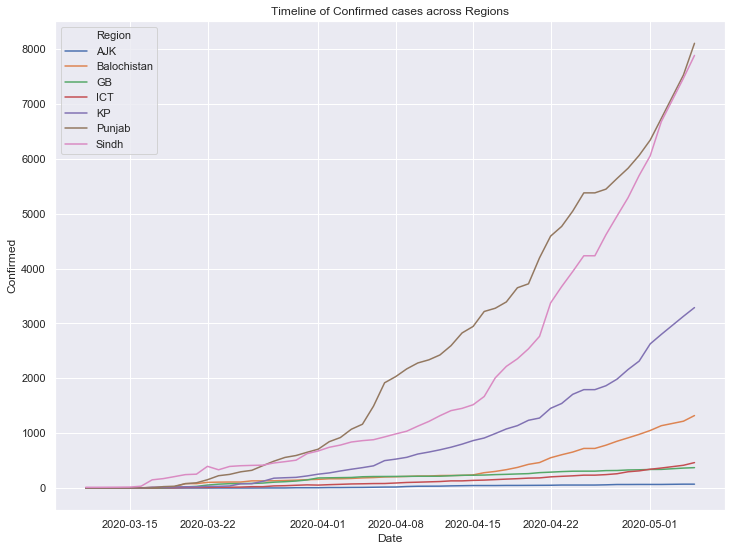

In [35]:
sns.lineplot(data = confirmed_by_regions,x = 'Date',y = 'Confirmed',hue='Region')
plt.title("Timeline of Confirmed cases across Regions");

In [36]:
dead_by_date = (sheet1.filter(['Date','Dead']).groupby('Date').agg('sum').reset_index())
dead_by_date

,Date,Dead
0,2020-03-11,0
1,2020-03-12,0
2,2020-03-13,0
3,2020-03-14,0
4,2020-03-15,0
5,2020-03-16,0
6,2020-03-17,0
7,2020-03-18,0
8,2020-03-19,2
9,2020-03-20,2


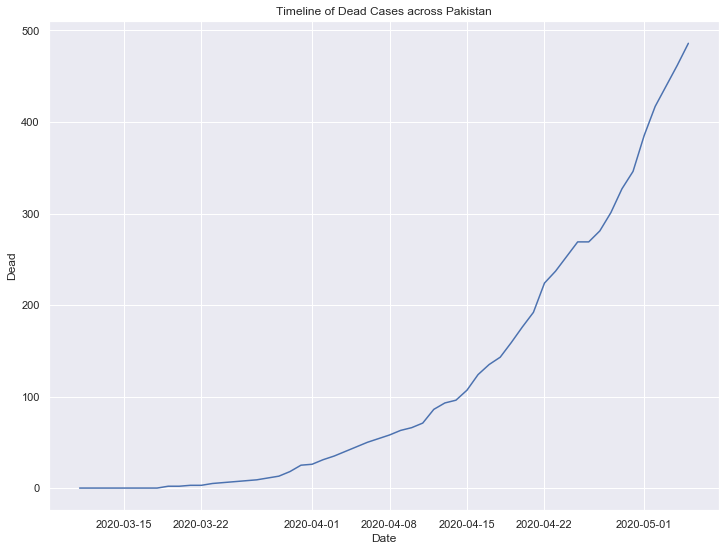

In [37]:
sns.lineplot(data = dead_by_date,x = 'Date',y = 'Dead')
plt.title("Timeline of Dead Cases across Pakistan");


In [38]:
regions_data=sheet1.filter(['Region','Confirmed','Dead','Recovered']).groupby('Region').agg('sum')
regions_data

,Confirmed,Dead,Recovered
Region,,,
AJK,1471,0,322
Balochistan,18232,234,7082
GB,9953,109,4219
ICT,6605,66,2070
KP,44273,2236,13015
Punjab,130190,1732,31145
Sindh,102987,1842,33487


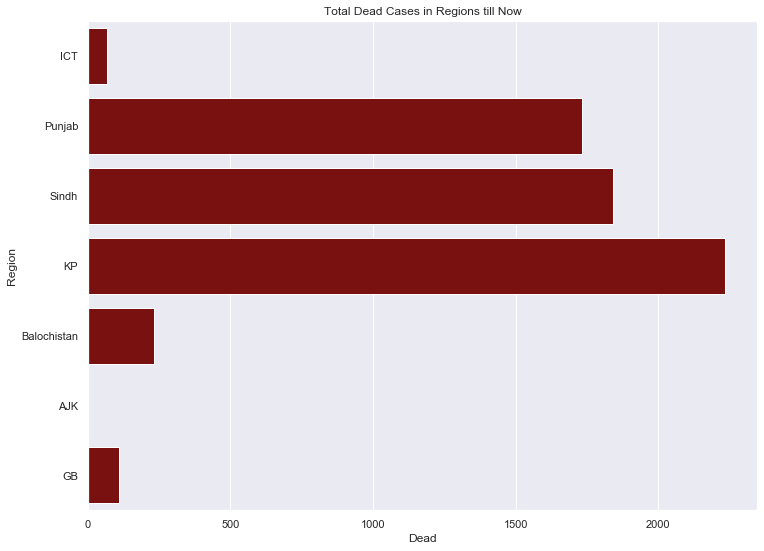

In [39]:
sns.barplot(data=sheet1,x='Dead',y='Region',color='darkred',ci=None,estimator=sum)
plt.title("Total Dead Cases in Regions till Now");

**Cleaning Sheet 2**

In [40]:
sheet2=covid_data.parse('TimeSeries_KeyIndicators_Detail')  #Opening  second sheet 
sheet2.head()


,Date,Province Old,Suspected Cases Last Date,Suspected Cases Last 24 Hrs,Suspected Cases Cumulative,Lab Tests Last 24 Hrs,Lab Tests Cumulative,Confirmed Cases Last Date,Confirmed Cases Last 24 Hrs,Confirmed Cases Cumulative,...,Confirmed HW - Active Doctors,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths
0,2020-04-04,AJK,322,21,343,21,343,9,2,11,...,0,0,0,0,0,0,0,0,0,0
1,2020-04-04,Balochistan,2171,230,2401,0,2401,169,6,175,...,0,0,0,0,0,0,0,0,0,0
2,2020-04-04,GB,961,2,963,844,860,190,3,193,...,0,0,0,0,0,0,0,0,0,0
3,2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,...,0,0,0,0,0,0,0,0,0,0
4,2020-04-04,KP,1938,431,2369,181,1624,311,32,343,...,0,0,0,0,0,0,0,0,0,0


In [41]:
sheet2.shape

(210, 53)

In [42]:
sheet2.index

RangeIndex(start=0, stop=210, step=1)

In [43]:
sheet2.columns

Index(['Date', 'Province Old', 'Suspected Cases Last Date',
       'Suspected Cases Last 24 Hrs', 'Suspected Cases Cumulative',
       'Lab Tests Last 24 Hrs', 'Lab Tests Cumulative',
       'Confirmed Cases Last Date', 'Confirmed Cases Last 24 Hrs',
       'Confirmed Cases Cumulative', ' Deaths Last Date',
       ' Deaths Last 24 Hrs', ' Deaths Cumulative',
       ' Deaths Ventilator Last 24 Hrs', 'Transmission Total',
       'Transmission Foreign - Iran', 'Transmission Foreign - Iran %',
       'Transmission Foreign - Other', 'Transmission Foreign - Other %',
       'Transmission Local - Tableegh', 'Transmission Local % - Tableegh',
       'Transmission Local - Others', 'Transmission Local % - Others',
       'Transmission Local', 'Transmission Local %', 'Total Hospitals',
       'Beds for COVID', 'Total Admitted', 'Admitted Stable',
       'Admitted Critical', 'Admitted Venilator', 'Home Quarantine',
       'Recovered', 'Death', 'Quarantine Facilities', 'Last 24 Hrs Arrival',
      

**Cleaning Sheet 3**

In [17]:
sheet3=covid_data.parse('TimeSeries_Action_Screen')  #Opening  third sheet
sheet3.head()


,Date,Cumulative travelers Screened,Suspected at Points of Entry,Travelers Screened at Points ofEntry in last 24 hours
0,11-Mar-2020,873288,26,21102
1,12-Mar-2020,894256,29,20968
2,13-Mar-2020,913542,33,19286
3,14-Mar-2020,933970,43,20428
4,15-Mar-2020,954646,59,20676


In [18]:
sheet3.shape

(24, 4)

In [19]:
sheet3.columns=['Date','Total_travelers_screened','Suspected_travelers','New_travelers_screened']

In [20]:
sheet3.head()

,Date,Total_travelers_screened,Suspected_travelers,New_travelers_screened
0,11-Mar-2020,873288,26,21102
1,12-Mar-2020,894256,29,20968
2,13-Mar-2020,913542,33,19286
3,14-Mar-2020,933970,43,20428
4,15-Mar-2020,954646,59,20676


In [21]:
sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Date                        24 non-null object
Total_travelers_screened    24 non-null int64
Suspected_travelers         24 non-null int64
New_travelers_screened      24 non-null int64
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


In [22]:
sheet3['Date']=pd.to_datetime(sheet3['Date'])
sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Date                        24 non-null datetime64[ns]
Total_travelers_screened    24 non-null int64
Suspected_travelers         24 non-null int64
New_travelers_screened      24 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 896.0 bytes


In [23]:
sheet3.isnull().sum()

Date                        0
Total_travelers_screened    0
Suspected_travelers         0
New_travelers_screened      0
dtype: int64

In [24]:
sheet3.duplicated().sum()

0

In [25]:
sheet3.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                        0
Total_travelers_screened    0
Suspected_travelers         0
New_travelers_screened      0
dtype: int64

**Cleaning Sheet 4** 

In [26]:
sheet4=covid_data.parse('TimeSeries_Action_Call')  #Opening  first sheet
sheet4.head()

,Returnees,Advised Self-Quarantine,Cumulative no offirst-time calls,Cumulativefollow-up calls,Date,First-time calls inpast 24 hrs,Follow-up calls inpast 24 hrs
0,Returnees from Iran,0,9459,2553,11-Mar-2020,0,353
1,Returnees from China,11,5342,7746,11-Mar-2020,17,400
2,Returnees from Iran,14,9475,3221,12-Mar-2020,16,668
3,Returnees from China,7,5352,7855,12-Mar-2020,10,109
4,Returnees from Iran,0,9475,3853,13-Mar-2020,0,632


In [27]:
sheet4.shape

(40, 7)

In [28]:
sheet4.isnull().sum()

Returnees                           0
Advised Self-Quarantine             0
Cumulative no offirst-time calls    0
Cumulativefollow-up calls           0
Date                                0
First-time calls inpast 24 hrs      0
Follow-up calls inpast 24 hrs       0
dtype: int64

In [29]:
sheet4.duplicated().sum()

0

In [30]:
sheet4.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Returnees                           0
Advised Self-Quarantine             0
Cumulative no offirst-time calls    0
Cumulativefollow-up calls           0
Date                                0
First-time calls inpast 24 hrs      0
Follow-up calls inpast 24 hrs       0
dtype: int64

**Cleaning Sheet 5**

In [39]:
sheet5=covid_data.parse('TimeSeries_COVID_News')  #Opening  first sheet
sheet5.head()

,Unnamed: 0,Date,News,Agg News
0,0,11-Mar-2020,Updates: Pakistan:,Updates: Pakistan: \n Three new cases have bee...
1,1,11-Mar-2020,Three new cases have been confirmed in the pas...,Updates: Pakistan: \n Three new cases have bee...
2,2,11-Mar-2020,Number of calls to passengers returning from I...,Updates: Pakistan: \n Three new cases have bee...
3,3,11-Mar-2020,Global:,Updates: Pakistan: \n Three new cases have bee...
4,4,11-Mar-2020,"Total cases: 118,887, Total Deaths: 4,290 •",Updates: Pakistan: \n Three new cases have bee...


In [40]:
sheet5.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet5.head()

,Date,News,Agg News
0,11-Mar-2020,Updates: Pakistan:,Updates: Pakistan: \n Three new cases have bee...
1,11-Mar-2020,Three new cases have been confirmed in the pas...,Updates: Pakistan: \n Three new cases have bee...
2,11-Mar-2020,Number of calls to passengers returning from I...,Updates: Pakistan: \n Three new cases have bee...
3,11-Mar-2020,Global:,Updates: Pakistan: \n Three new cases have bee...
4,11-Mar-2020,"Total cases: 118,887, Total Deaths: 4,290 •",Updates: Pakistan: \n Three new cases have bee...


In [41]:
sheet5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
Date        146 non-null object
News        146 non-null object
Agg News    146 non-null object
dtypes: object(3)
memory usage: 3.5+ KB


In [48]:
sheet5['Date']=pd.to_datetime(sheet5['Date'])
sheet5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
Date        146 non-null datetime64[ns]
News        146 non-null object
Agg News    146 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 3.5+ KB


In [43]:
sheet5.isnull().sum()

Date        0
News        0
Agg News    0
dtype: int64

In [44]:
print(sheet5.duplicated().sum())
sheet5.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

0


Date        0
News        0
Agg News    0
dtype: int64

**Cleaning Sheet 6**

In [45]:
sheet6=covid_data.parse('TimeSeries_NIH_Response')  #Opening  first sheet
sheet6.head()

,Unnamed: 0,Date,NIH Preparedness and Response,Agg NIH Preparedness and Response
0,0,11-Mar-2020,BSL-3 mobile lab with state of art equipment h...,BSL-3 mobile lab with state of art equipment h...
1,1,11-Mar-2020,IPC trainings have been completed at Gilgit an...,BSL-3 mobile lab with state of art equipment h...
2,2,11-Mar-2020,Training of the GB lab staff has been conducte...,BSL-3 mobile lab with state of art equipment h...
3,3,11-Mar-2020,IPC training is in progress for FG Hospital st...,BSL-3 mobile lab with state of art equipment h...
4,0,12-Mar-2020,BSL-3 mobile lab is ready for testing. •,BSL-3 mobile lab is ready for testing. • \n I...


In [46]:
sheet6.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet6.head()

,Date,NIH Preparedness and Response,Agg NIH Preparedness and Response
0,11-Mar-2020,BSL-3 mobile lab with state of art equipment h...,BSL-3 mobile lab with state of art equipment h...
1,11-Mar-2020,IPC trainings have been completed at Gilgit an...,BSL-3 mobile lab with state of art equipment h...
2,11-Mar-2020,Training of the GB lab staff has been conducte...,BSL-3 mobile lab with state of art equipment h...
3,11-Mar-2020,IPC training is in progress for FG Hospital st...,BSL-3 mobile lab with state of art equipment h...
4,12-Mar-2020,BSL-3 mobile lab is ready for testing. •,BSL-3 mobile lab is ready for testing. • \n I...


In [47]:
sheet6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
Date                                 65 non-null object
NIH Preparedness and Response        65 non-null object
Agg NIH Preparedness and Response    65 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [49]:
sheet6['Date']=pd.to_datetime(sheet6['Date'])
sheet6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
Date                                 65 non-null datetime64[ns]
NIH Preparedness and Response        65 non-null object
Agg NIH Preparedness and Response    65 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


In [50]:
print(sheet6.isnull().sum())

Date                                 0
NIH Preparedness and Response        0
Agg NIH Preparedness and Response    0
dtype: int64


In [51]:
sheet6.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                                 0
NIH Preparedness and Response        0
Agg NIH Preparedness and Response    0
dtype: int64

In [61]:
sheet6.duplicated().sum()

0

**Cleaning Sheet 7**

In [62]:
sheet7=covid_data.parse('TimeSeries_NIH_Risk')  #Opening  first sheet
sheet7.head()



 

,Unnamed: 0,Date,Risk Assessment NIH
0,0,11-Mar-2020,MODERATE.
1,0,12-Mar-2020,MODERATE.
2,0,13-Mar-2020,MODERATE.
3,0,14-Mar-2020,MODERATE.
4,0,15-Mar-2020,Moderate


In [67]:
sheet7.shape

(24, 3)

In [66]:
sheet7['Unnamed: 0'].isin([0]).sum()

24

In [68]:
sheet7.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet7.head()

,Date,Risk Assessment NIH
0,11-Mar-2020,MODERATE.
1,12-Mar-2020,MODERATE.
2,13-Mar-2020,MODERATE.
3,14-Mar-2020,MODERATE.
4,15-Mar-2020,Moderate


In [69]:
sheet7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Date                   24 non-null object
Risk Assessment NIH    24 non-null object
dtypes: object(2)
memory usage: 512.0+ bytes


In [70]:
sheet7['Date']=pd.to_datetime(sheet7['Date'])
sheet7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Date                   24 non-null datetime64[ns]
Risk Assessment NIH    24 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 512.0+ bytes


In [73]:
print(sheet7.isnull().sum())
sheet7.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                   0
Risk Assessment NIH    0
dtype: int64


Date                   0
Risk Assessment NIH    0
dtype: int64

In [74]:
sheet7.duplicated().sum()

0

**Cleaninng Sheet 8**

In [75]:
sheet8=covid_data.parse('TimeSeries_Province_Response')  #Opening  first sheet
sheet8.head()



,Unnamed: 0,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
0,0,Balochistan,316 newly arrived individuals screened and qua...,11-Mar-2020,316 newly arrived individuals screened and qua...
1,1,Balochistan,14 Chinese nationals quarantined at East Bay E...,11-Mar-2020,316 newly arrived individuals screened and qua...
2,2,Sindh,Staff deployed to designated quarantine facili...,11-Mar-2020,Staff deployed to designated quarantine facili...
3,3,Sindh,Training and orientation sessions for the heal...,11-Mar-2020,Staff deployed to designated quarantine facili...
4,4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...


In [76]:
sheet8.shape

(166, 5)

In [78]:
sheet8[sheet8['Unnamed: 0']==4]

,Unnamed: 0,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
4,4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...
12,4,KP & TD,01 alert generated (self-referral) in Police a...,12-Mar-2020,01 alert generated (self-referral) in Police a...
20,4,KP & TD,"A total of 75 personnel including doctors, par...",13-Mar-2020,"A total of 75 personnel including doctors, par..."
29,4,AJK,Chest Diseases General Hospital (CDGH) Hill Ch...,14-Mar-2020,Chest Diseases General Hospital (CDGH) Hill Ch...
36,4,Sindh,Quarantine facilities established and operatio...,15-Mar-2020,Quarantine facilities established and operatio...
46,4,KP & TD,Four new suspected cases reported from Police ...,16-Mar-2020,Four new suspected cases reported from Police ...
54,4,Punjab,"PDSRU is in 24/7 coordination with NIH, Islama...",17-Mar-2020,"PDSRU is in 24/7 coordination with NIH, Islama..."
62,4,KP & TD,Quarantine facility for 171 passengers establi...,18-Mar-2020,Quarantine facility for 171 passengers establi...
70,4,AJK,Contact tracing of confirmed case being carrie...,19-Mar-2020,Contact tracing of confirmed case being carrie...
76,4,KP & TD,Contact tracing of all suspected and confirmed...,20-Mar-2020,Contact tracing of all suspected and confirmed...


In [79]:
sheet8.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet8.head()

,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
0,Balochistan,316 newly arrived individuals screened and qua...,11-Mar-2020,316 newly arrived individuals screened and qua...
1,Balochistan,14 Chinese nationals quarantined at East Bay E...,11-Mar-2020,316 newly arrived individuals screened and qua...
2,Sindh,Staff deployed to designated quarantine facili...,11-Mar-2020,Staff deployed to designated quarantine facili...
3,Sindh,Training and orientation sessions for the heal...,11-Mar-2020,Staff deployed to designated quarantine facili...
4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...


In [80]:
sheet8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
region                                     166 non-null object
Provinces Preparedness and Response        166 non-null object
Date                                       166 non-null object
Agg Provinces Preparedness and Response    166 non-null object
dtypes: object(4)
memory usage: 5.3+ KB


In [81]:
sheet8['Date']=pd.to_datetime(sheet8['Date'])
sheet8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
region                                     166 non-null object
Provinces Preparedness and Response        166 non-null object
Date                                       166 non-null datetime64[ns]
Agg Provinces Preparedness and Response    166 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 5.3+ KB


In [82]:
sheet8.isnull().sum()

region                                     0
Provinces Preparedness and Response        0
Date                                       0
Agg Provinces Preparedness and Response    0
dtype: int64

In [83]:
sheet8.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

region                                     0
Provinces Preparedness and Response        0
Date                                       0
Agg Provinces Preparedness and Response    0
dtype: int64

In [84]:
sheet8.duplicated().sum()

0

**Cleaning Sheet 9**

In [85]:
sheet9=covid_data.parse('TimeSeries_Helpline_Calls')  #Opening  first sheet
sheet9.head()


,Unnamed: 0,Cumulative Calls,Date,New Calls
0,0,12481,2020-03-11,547
1,0,13167,2020-03-12,686
2,0,13896,2020-03-13,729
3,0,15340,2020-03-14,1444
4,0,19131,2020-03-15,3791


In [86]:
sheet9.shape

(24, 4)

In [88]:
sheet9['Unnamed: 0'].isin([0]).sum()

24

In [89]:
sheet9.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet9.head()

,Cumulative Calls,Date,New Calls
0,12481,2020-03-11,547
1,13167,2020-03-12,686
2,13896,2020-03-13,729
3,15340,2020-03-14,1444
4,19131,2020-03-15,3791


In [90]:
sheet9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Cumulative Calls    24 non-null int64
Date                24 non-null datetime64[ns]
New Calls           24 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 704.0 bytes


In [102]:
sheet9['Date']=pd.to_datetime(sheet9['Date']).dt.strftime('%d-%m-%Y') #change format acc to Pak date
sheet9.head()

,Cumulative Calls,Date,New Calls
0,12481,03-11-2020,547
1,13167,03-12-2020,686
2,13896,13-03-2020,729
3,15340,14-03-2020,1444
4,19131,15-03-2020,3791


In [106]:
print(sheet9.isnull().sum())
sheet9.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Cumulative Calls    0
Date                0
New Calls           0
dtype: int64


Cumulative Calls    0
Date                0
New Calls           0
dtype: int64

In [107]:
sheet9.duplicated().sum()

0

**Cleaning Sheet 10**

In [108]:
sheet10=covid_data.parse('TimeSeries_Quarantine_Details')  #Opening  first sheet
sheet10.head()



 

,Unnamed: 0,Regions,Quarantine facilities (n),No. of arrivals in last 24 hrs,Cumulative no of persons present,Date
0,0,ICT,1,0,24,2020-04-01
1,1,Punjab,4,0,2956,2020-04-01
2,2,Sindh,5,0,1388,2020-04-01
3,3,KP,92,181,3260,2020-04-01
4,4,Balochistan,9,0,366,2020-04-01


In [109]:
sheet10.shape

(21, 6)

In [110]:
sheet10.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet10.head()

,Regions,Quarantine facilities (n),No. of arrivals in last 24 hrs,Cumulative no of persons present,Date
0,ICT,1,0,24,2020-04-01
1,Punjab,4,0,2956,2020-04-01
2,Sindh,5,0,1388,2020-04-01
3,KP,92,181,3260,2020-04-01
4,Balochistan,9,0,366,2020-04-01


In [111]:
sheet10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
Regions                             21 non-null object
Quarantine facilities (n)           21 non-null int64
No. of arrivals in last 24 hrs      21 non-null int64
Cumulative no of persons present    21 non-null int64
Date                                21 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 968.0+ bytes


In [112]:
sheet10['Date']=pd.to_datetime(sheet10['Date']).dt.strftime('%d-%m-%Y') #change format acc to Pak date
sheet10.head()

,Regions,Quarantine facilities (n),No. of arrivals in last 24 hrs,Cumulative no of persons present,Date
0,ICT,1,0,24,01-04-2020
1,Punjab,4,0,2956,01-04-2020
2,Sindh,5,0,1388,01-04-2020
3,KP,92,181,3260,01-04-2020
4,Balochistan,9,0,366,01-04-2020


In [116]:
print(sheet10.isnull().any())

Regions                             False
Quarantine facilities (n)           False
No. of arrivals in last 24 hrs      False
Cumulative no of persons present    False
Date                                False
dtype: bool


In [114]:
sheet10.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Regions                             0
Quarantine facilities (n)           0
No. of arrivals in last 24 hrs      0
Cumulative no of persons present    0
Date                                0
dtype: int64

In [115]:
sheet10.duplicated().sum()

0

In [117]:
sheet10.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)